In [1]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
import sys
import numpy as np
import random

In [2]:
main_dir ="/u/home/b/briscoel/project-halperin/MicroBatch/data/"
script_folder= "/u/home/b/briscoel/project-halperin/MicroBatch/RevisionSequence/"
local = True

sys.argv = [ "Thomasr_complete_otu","rel",""]

if local:
    main_dir = "/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/"
    script_folder = "/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/RevisionSequence/"

folder = sys.argv[0] # "AGPr_max_k5" #"AGPr_complete_otu" 
trans = sys.argv[1] #"rel"

data_dir = main_dir + folder + "/"



metadata_table = pd.read_csv(data_dir + "metadata.txt", delimiter = "\t",header=0)



In [3]:

mylist = ['FengQ_2015', 'ZellerG_2014','HanniganGD_2017','ThomasAM_2018a','ThomasAM_2018b',
         'VogtmannE_2016','YuJ_2015','ZellerG_2014']

#mylist = ['ZellerG_2014','HanniganGD_2017']
            
pattern = '|'.join(mylist)        

In [16]:
corrections = ["nocorrection","percentilenorm","bmc","limmacounts","combatcounts","clr_pcacounts","clr_scale_pca"] 
random.seed(0)

scores_list= []
for correction in corrections:
    print(correction)
    if correction == "nocorrection":
        feature_table = pd.read_csv(data_dir  + "feature_table_" + trans + ".txt" ,delimiter = "\t",header=0)
    else:
        feature_table = pd.read_csv(data_dir  +"feature_table_" + trans + "_" + correction + ".txt" ,delimiter = "\t",header=0)

   
    
    X = np.array(feature_table.T[(metadata_table['bin_crc_normal'].notna()) & (metadata_table['dataset_name'].str.contains(pattern))])
    y = np.array(metadata_table[(metadata_table['bin_crc_normal'].notna()) & (metadata_table['dataset_name'].str.contains(pattern))]['bin_crc_normal'])

        # prepare the cross-validation procedure
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    # create model
    model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    scores_list.append(scores)

nocorrection


/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


Accuracy: 0.656 (0.032)
percentilenorm


/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


Accuracy: 0.672 (0.018)
bmc


/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


Accuracy: 0.659 (0.037)
limmacounts


/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


Accuracy: 0.606 (0.042)
combatcounts


/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


Accuracy: 0.499 (0.046)
clr_pcacounts


/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


Accuracy: 0.654 (0.042)
clr_scale_pca


/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


Accuracy: 0.726 (0.021)


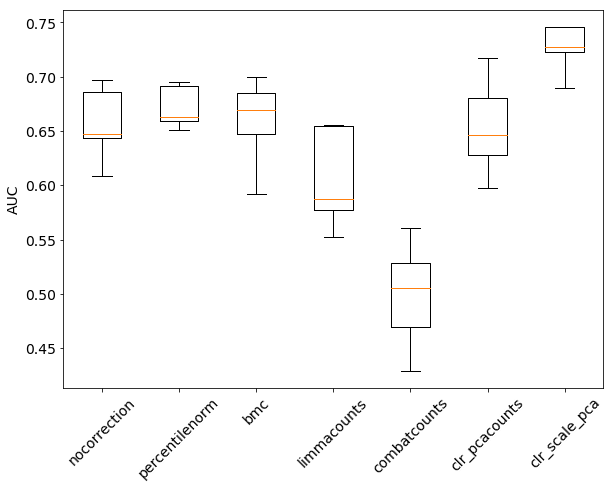

In [38]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0.1,0.2,0.75,0.75])
 
# Creating plot
bp = ax.boxplot(scores_list)
ax.tick_params(axis='x', which='major', labelsize=14,rotation=45)
ax.tick_params(axis='y', which='major', labelsize=14)
ax.set_xticklabels(corrections)
plt.ylabel("AUC",size=14)
# show plot

plt.savefig('logistic.pdf',dpi=300,format='pdf')
plt.show(bp)